# **Perbandingan Algoritma KNN dan Naive Bayes untuk Klasifikasi Kanker Payudara pada Dataset Wisconsin Diagnostic**

## **Pendahuluan**

Kanker payudara merupakan salah satu penyakit paling mematikan di dunia, terutama di kalangan perempuan. Menurut data dari World Health Organization (WHO), kanker payudara adalah jenis kanker yang paling umum terjadi dan menjadi penyebab utama kematian akibat kanker pada perempuan di seluruh dunia. Deteksi dini kanker payudara sangat penting untuk meningkatkan peluang kesembuhan pasien. Oleh karena itu, pengembangan sistem prediksi berbasis data medis sangat diperlukan untuk membantu dokter dalam proses diagnosis.

Seiring berkembangnya teknologi, penerapan Machine Learning dalam dunia medis telah menjadi alternatif yang menjanjikan untuk mendeteksi penyakit secara lebih cepat dan akurat. Salah satu studi yang banyak dilakukan adalah klasifikasi jenis kanker payudara menjadi dua kategori utama, yaitu ganas (malignant) dan jinak (benign). Dataset Wisconsin Breast Cancer Diagnostic merupakan salah satu dataset yang paling sering digunakan untuk keperluan penelitian dan pengembangan sistem klasifikasi kanker payudara.

## **Data Understanding**

### Sumber Data :

Dataset yang saya gunakan dalam project ini adalah **Wisconsin Breast Cancer Diagnostic Dataset (WBCD)**. Dataset ini disediakan oleh Dr. William H. Wolberg, seorang ahli patologi di University of Wisconsin Hospitals, dan tersedia secara publik melalui **UCI Machine Learning Repository**.

untuk link dataset yang diambil: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

### Tujuan :

Tujuan utama dari dataset ini adalah untuk:

- Memprediksi jenis tumor payudara berdasarkan fitur-fitur hasil ekstraksi digital dari citra biopsi jaringan payudara.

- Klasifikasi dilakukan ke dalam dua kategori:

  - Malignant (M): Tumor ganas

  - Benign (B): Tumor jinak

### Integrasi Data :

untuk mengambil data agar dapat diolah, perlu untuk menginstall package yang telah disediakan oleh UCI Dataset. Instalasi dilakukan berguna untuk menarik data yang berasal dari UCI dataset agar dapat diolah. peritah untuk mengambil data dari UCI dataset dapat di lihat ketika menekan tombol import in python pada datase yang diinginkan dan ikuti perintah tersebut agar data dapat diambil dari UCI dataset. Contoh pengambilan data dari UCI dataset dapat dilihat pada gambar dan perintah berikut:

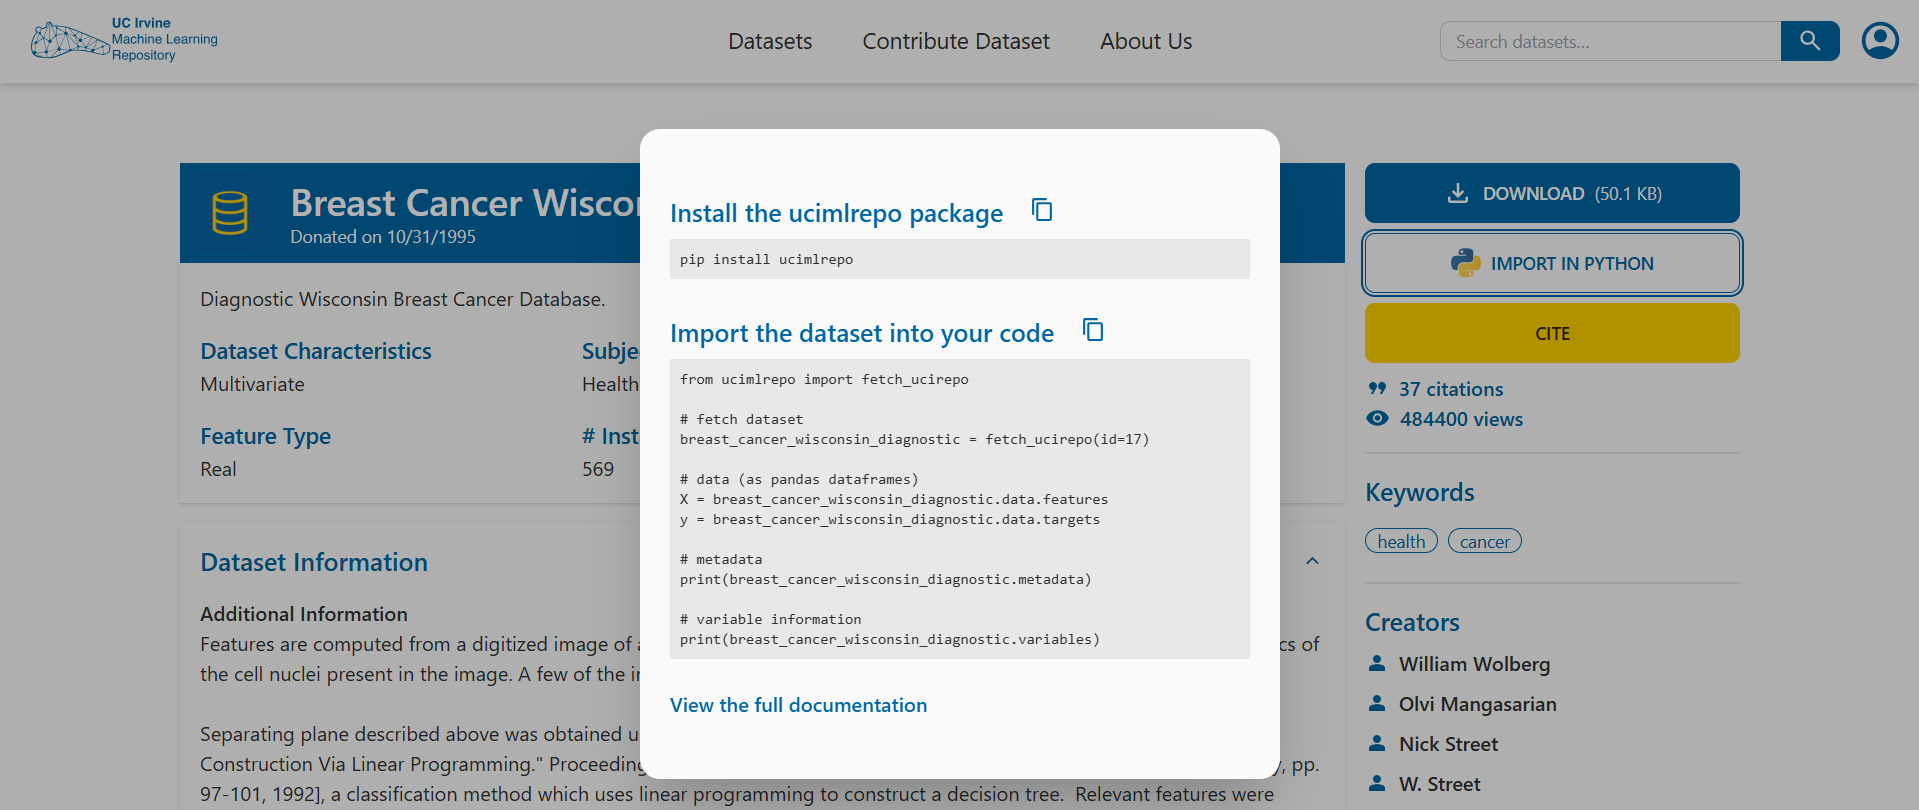

In [162]:
!pip install ucimlrepo

In [163]:
# Import library
from ucimlrepo import fetch_ucirepo
import pandas as pd

# Ambil dataset dari UCI
bc = fetch_ucirepo(id=17)

# Ekstrak fitur dan label asli
X = bc.data.features
y = bc.data.targets

# Gabungkan ke dalam satu DataFrame
df_raw = X.copy()
df_raw['Diagnosis'] = y

# Cek struktur awal dataset
print("Struktur dataset asli:")
print(df_raw.info())

# Tampilkan 5 data awal
display(df_raw.head())


Struktur dataset asli:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null  

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


### Eksplorasi Data

#### Visualisasi Data

Visualisasi histogram ini membantu untuk melihat distribusi nilai tiap fitur dan perbandingan berdasarkan kelas label (Diagnosis).

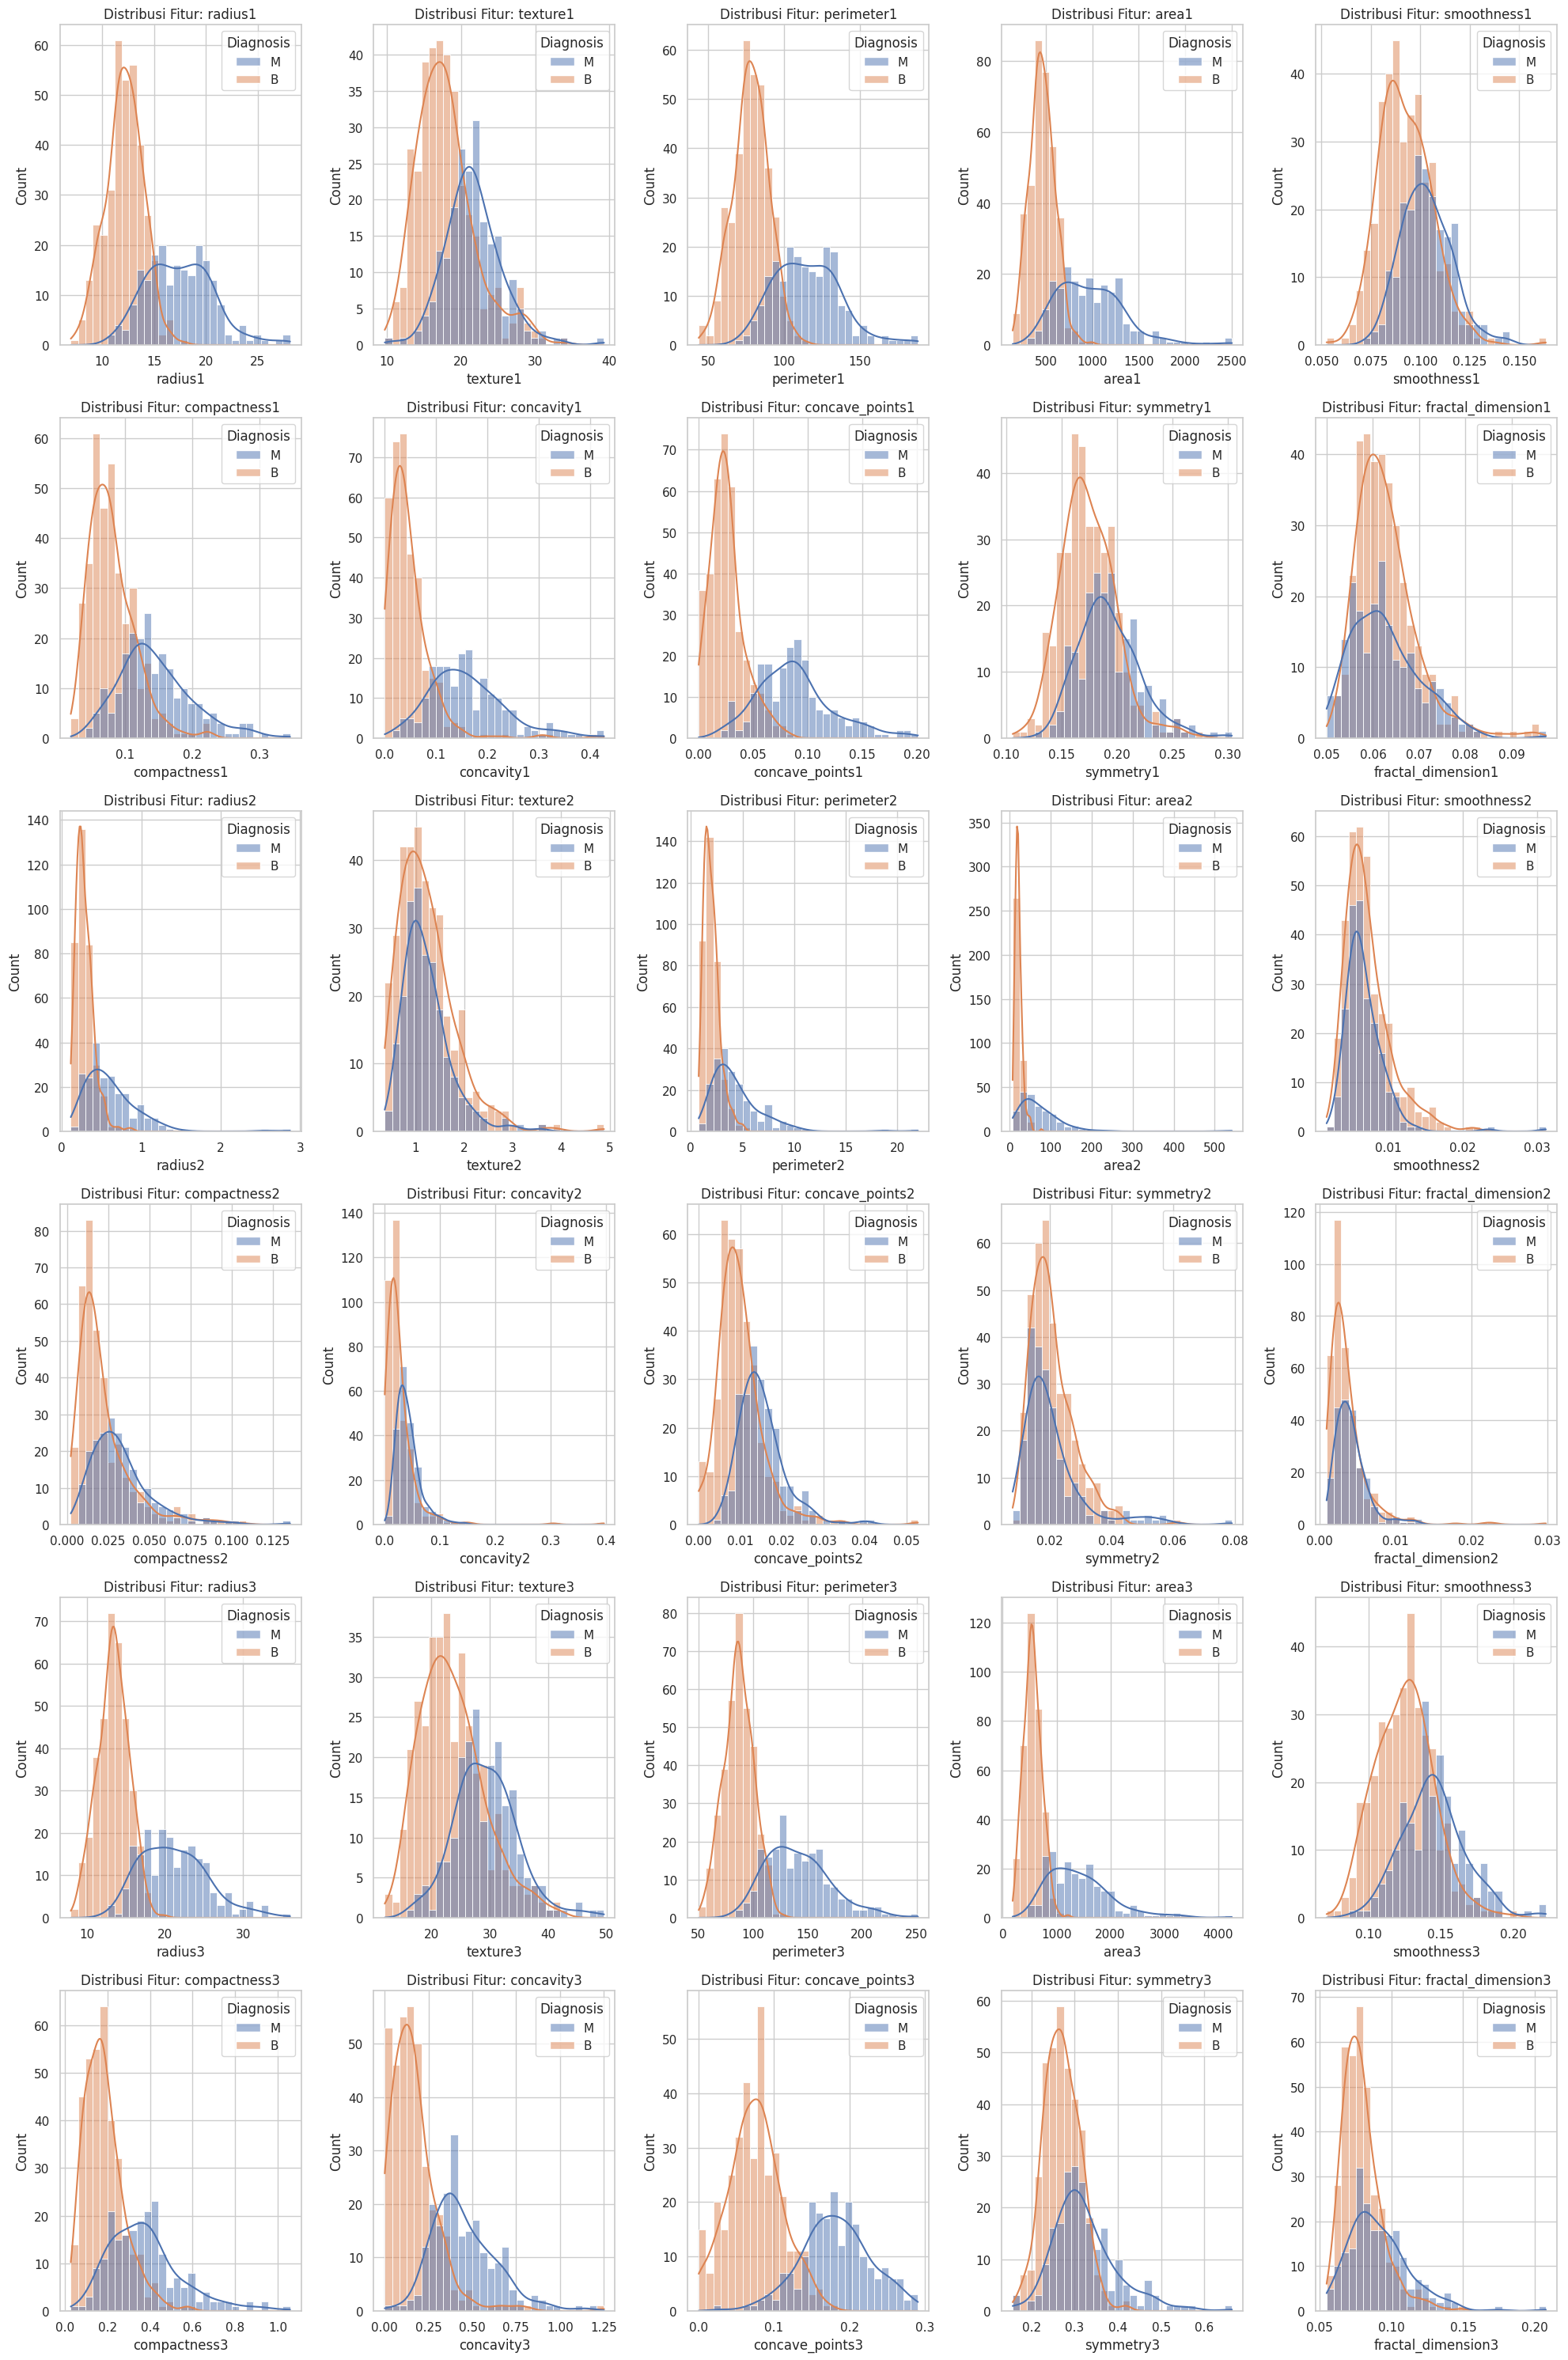

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns

# Atur tampilan grafik
sns.set(style="whitegrid")
# Increase the figure size to accommodate more subplots
plt.figure(figsize=(20, 30)) # Increased figure size

# Plot distribusi tiap fitur terhadap Diagnosis
# Calculate the number of rows and columns needed for the subplots
num_features = len(df_raw.columns[:-1])
num_cols = 5 # Let's use 5 columns
num_rows = (num_features + num_cols - 1) // num_cols # Calculate required rows, rounding up

for i, column in enumerate(df_raw.columns[:-1]):
    # Use the calculated number of rows and columns for the subplot grid
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(data=df_raw, x=column, hue="Diagnosis", kde=True, bins=30)
    plt.title(f"Distribusi Fitur: {column}")

plt.tight_layout()
plt.show()

Korelasi penting untuk mengidentifikasi fitur-fitur yang saling berkaitan secara linear, hal ini bisa berguna nanti untuk analisis multivariat dan seleksi fitur.

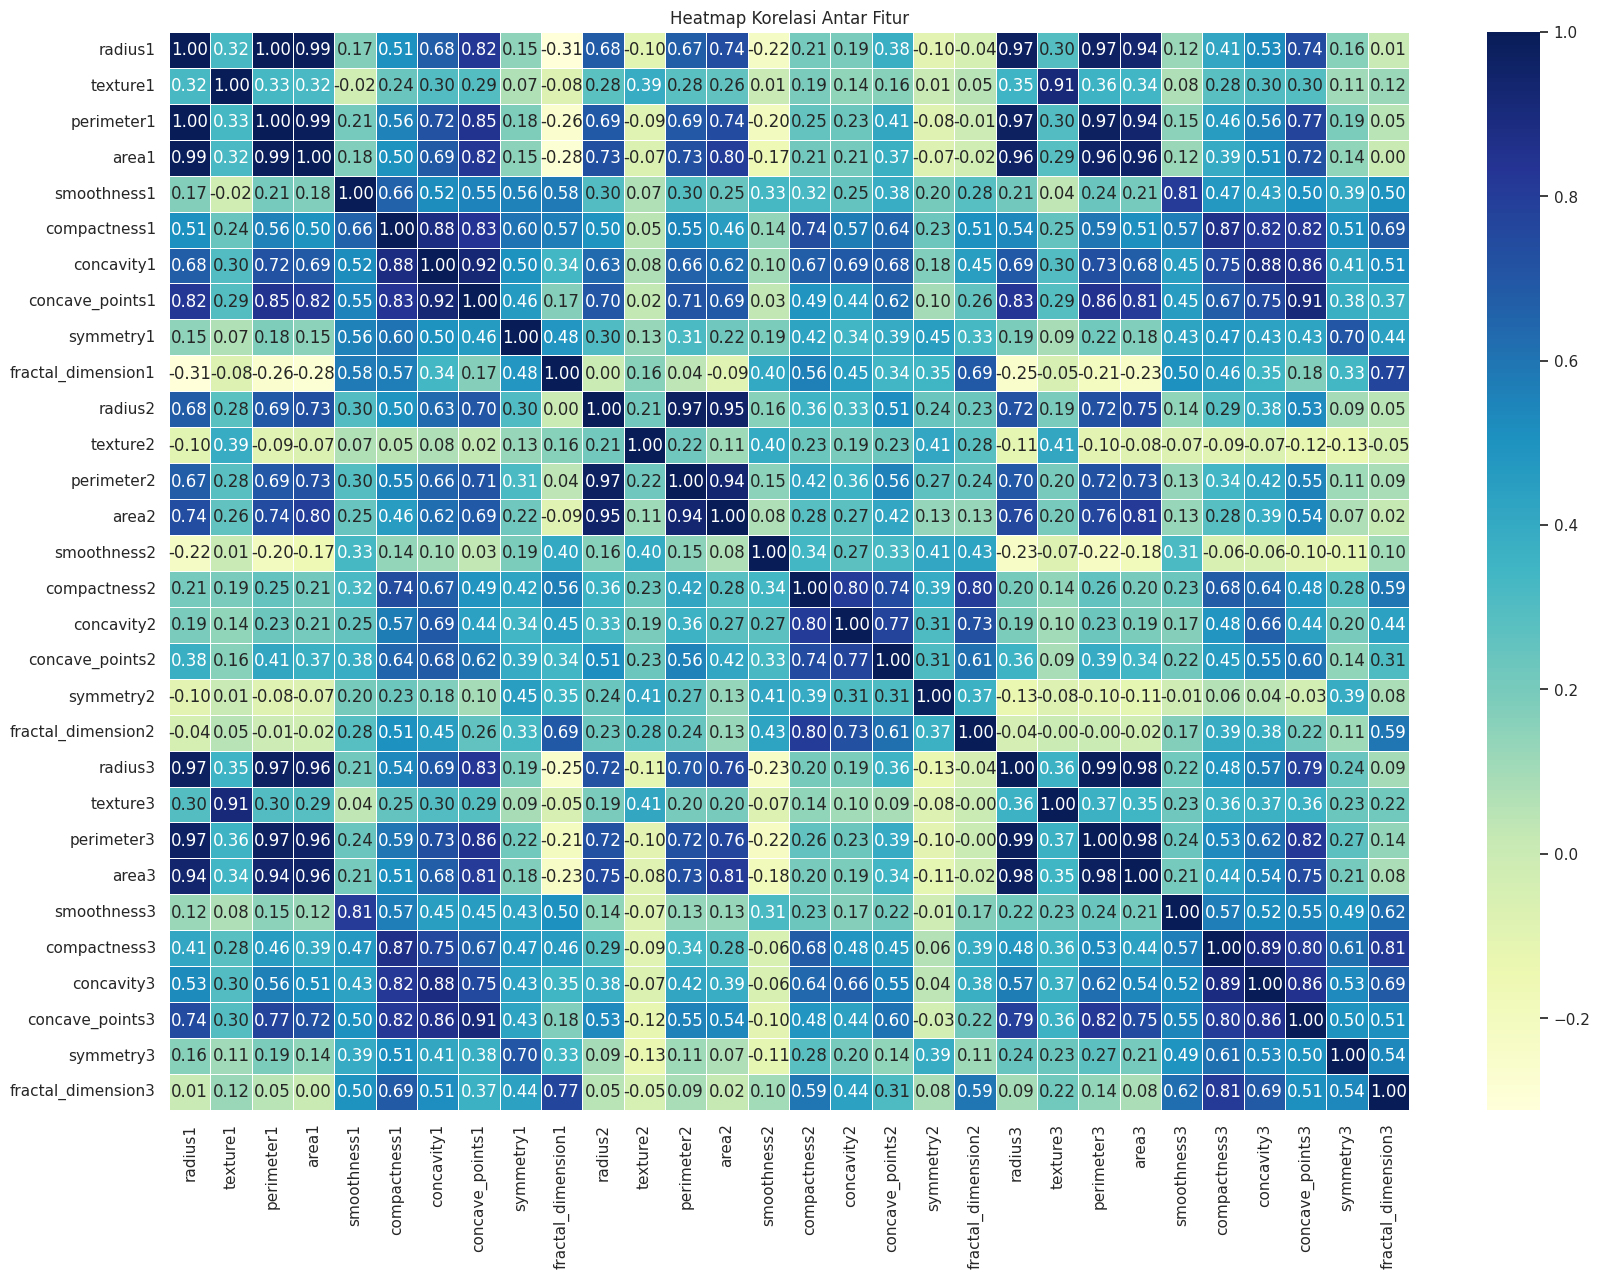

In [165]:
plt.figure(figsize=(20, 14))
correlation_matrix = df_raw.drop(columns='Diagnosis').corr()

sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()


### Struktur Dataset

#### Fitur

**Mean (Rata-Rata)**

- `radius_mean`:	Rata-rata panjang radius dari pusat ke batas sel

- `texture_mean`:	Rata-rata variasi dalam level abu-abu (tekstur permukaan)

- `perimeter_mean`:	Rata-rata keliling dari kontur sel

- `area_mean`: Rata-rata luas permukaan inti sel

- `smoothness_mean`:	Ukuran seberapa halus batas sel

- `compactness_mean`:	Ukuran kekompakan sel: dihitung dari (perimeter² / area)

- `concavity_mean`	Derajat kecekungan permukaan sel

- `concave points_mean`:	Jumlah titik cekung pada kontur sel

- `symmetry_mean`:	Ukuran simetri sel

- `fractal_dimension_mean`: Ukuran kompleksitas (dimensi fraktal) dari batas sel


**Standard Error (SE)**

- radius_se	Standar deviasi dari radius sel

- texture_se	Standar deviasi dari tekstur sel

- perimeter_se	Standar deviasi dari keliling sel

- area_se	Standar deviasi dari area sel

- smoothness_se	Variasi tingkat kehalusan batas sel

- compactness_se	Variasi kekompakan sel

- concavity_se	Variasi kecekungan kontur sel

- concave points_se	Variasi jumlah titik cekung

- symmetry_se	Variasi simetri sel

- fractal_dimension_se	Variasi dimensi fraktal batas sel


**Worst (Nilai Maksimum)**

- radius_worst	Nilai maksimum panjang radius

- texture_worst	Nilai maksimum variasi tekstur

- perimeter_worst	Keliling maksimum kontur sel

- area_worst	Luas maksimum sel yang terdeteksi

- smoothness_worst	Kekasaran batas sel yang tertinggi

- compactness_worst	Nilai kekompakan tertinggi

- concavity_worst	Kecekungan kontur sel terbesar

- concave points_worst	Jumlah titik cekung terbanyak

- symmetry_worst	Asimetri tertinggi

- fractal_dimension_worst	Kompleksitas bentuk paling tinggi

#### Label

Nilai label (Diagnosis) masih berupa:

- 'B' → Benign (jinak)

- 'M' → Malignant (ganas)

In [166]:
# Jumlah kolom dan label
print(f"Jumlah fitur: {df_raw.shape[1] - 1}")
print(f"Jumlah label: 1 ('Diagnosis')")

# Tipe data fitur
struktur_fitur = pd.DataFrame({
    'Nama Fitur': df_raw.drop(columns='Diagnosis').columns,
    'Tipe Data': df_raw.drop(columns='Diagnosis').dtypes.values
})

print("\nStruktur Fitur:")
print(struktur_fitur)

# Label Diagnosis masih berupa 'M' dan 'B'
print("\nLabel Diagnosis unik:")
print(df_raw['Diagnosis'].value_counts())


Jumlah fitur: 30
Jumlah label: 1 ('Diagnosis')

Struktur Fitur:
            Nama Fitur Tipe Data
0              radius1   float64
1             texture1   float64
2           perimeter1   float64
3                area1   float64
4          smoothness1   float64
5         compactness1   float64
6           concavity1   float64
7      concave_points1   float64
8            symmetry1   float64
9   fractal_dimension1   float64
10             radius2   float64
11            texture2   float64
12          perimeter2   float64
13               area2   float64
14         smoothness2   float64
15        compactness2   float64
16          concavity2   float64
17     concave_points2   float64
18           symmetry2   float64
19  fractal_dimension2   float64
20             radius3   float64
21            texture3   float64
22          perimeter3   float64
23               area3   float64
24         smoothness3   float64
25        compactness3   float64
26          concavity3   float64
27     conca

### Identifikasi Kualitas Dataset

#### Deteksi Missing Value

In [167]:
# Cek missing value per kolom
missing_per_column = df_raw.isnull().sum()

# Total keseluruhan missing value
total_missing = df_raw.isnull().sum().sum()

# Tampilkan hasil
print("Missing value per kolom:\n", missing_per_column)
print(f"\nTotal missing value di seluruh dataset: {total_missing}")


Missing value per kolom:
 radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
Diagnosis             0
dtype: int64

Total missing value di seluruh dataset: 0


Berdasarkan hasil pemeriksaan terhadap dataset, tidak ditemukan nilai kosong (missing value) pada seluruh kolom fitur maupun label. Hal ini menunjukkan bahwa dataset bersih dan siap untuk digunakan dalam proses pelatihan model klasifikasi tanpa perlu proses imputasi atau penghapusan data.

## **Preprocessing**

### Transformasi Label

Label Diagnosis masih dalam bentuk string ('M' atau 'B'). Untuk bisa digunakan oleh model klasifikasi, label ini perlu diubah menjadi nilai numerik (1 dan 0).

In [168]:
from sklearn.preprocessing import LabelEncoder

# Salin dataset asli (df_raw) agar tidak rusak
df = df_raw.copy()

# Transformasi label Diagnosis
le = LabelEncoder()
df['Diagnosis'] = le.fit_transform(df['Diagnosis'])  # 'M' → 1, 'B' → 0

# Cek hasil
print(df['Diagnosis'].value_counts())  # Pastikan label sudah berupa 0 dan 1


Diagnosis
0    357
1    212
Name: count, dtype: int64


### Seleksi Fitur

Dari 30 fitur yang tersedia, saya memilih 10 fitur paling relevan terhadap label menggunakan metode statistik ANOVA F-test (SelectKBest).

In [169]:
from sklearn.feature_selection import SelectKBest, f_classif

# Pisahkan fitur dan label
X = df.drop(columns='Diagnosis')
y = df['Diagnosis']

# Seleksi 10 fitur terbaik
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y)

# Ambil nama kolom fitur terpilih
selected_features = X.columns[selector.get_support()]
print("Fitur terpilih:", list(selected_features))

# Bentuk DataFrame baru dengan fitur terpilih
X = pd.DataFrame(X_selected, columns=selected_features)

Fitur terpilih: ['radius1', 'perimeter1', 'area1', 'concavity1', 'concave_points1', 'radius3', 'perimeter3', 'area3', 'concavity3', 'concave_points3']


Untuk fitur yang saya ambil atau gunakan sebagai berikut;

- `radius1`: `radius_mean`

- `perimeter1`: `perimeter_mean`
    
- `area1`: `area_mean`

- `concavity1`: `concavity_mean`
    
- `concave_points1`: `concave points_mean`

- `radius3`: `radius_worst`
    
- `perimeter3`: `perimeter_worst`

- `area3`: `area_worst`

- `concavity3`: `concavity_worst`

- `concave_points3`: `concave points_worst`

In [170]:
# Mapping nama kolom pendek ke versi lengkap
rename_dict = {
    'radius1': 'radius',
    'perimeter1': 'perimeter',
    'area1': 'area',
    'concavity1': 'concavity',
    'concave_points1': 'concave points',
    'radius3': 'radius',
    'perimeter3': 'perimeter',
    'area3': 'area',
    'concavity3': 'concavity',
    'concave_points3': 'concave points'
}

# Rename kolom setelah feature selection
X.rename(columns=rename_dict, inplace=True)

# Cek hasil
print("Kolom setelah di-rename:")
print(X.columns)


Kolom setelah di-rename:
Index(['radius', 'perimeter', 'area', 'concavity', 'concave points', 'radius',
       'perimeter', 'area', 'concavity', 'concave points'],
      dtype='object')


### Cek Outlier

Outlier bisa mengganggu proses pelatihan model dan menyebabkan akurasi yang tidak stabil, terutama pada model berbasis jarak seperti KNN. Langkah ini tidak wajib, tetapi sangat direkomendasikan untuk mengetahui seberapa ekstrem data dan mempertimbangkan apakah outlier perlu dihapus atau teteap digunakan.


Jumlah outlier (> 3 std deviasi) per fitur:
area              10
concavity          9
area               8
perimeter          7
concavity          7
radius             6
perimeter          6
concave points     6
radius             5
concave points     0
dtype: int64


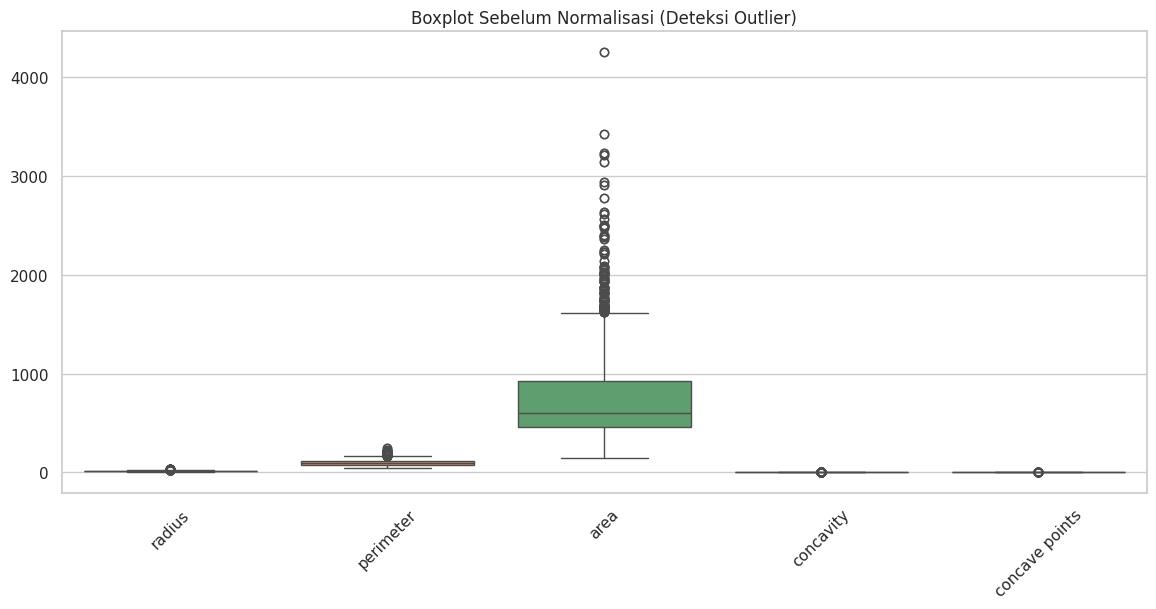

In [171]:
from scipy.stats import zscore

# Buat salinan dari X sebelum scaling
X_unscaled = X.copy()

# Hitung z-score
z_scores = pd.DataFrame(zscore(X_unscaled), columns=X_unscaled.columns)

# Hitung jumlah outlier per kolom (> 3 std deviasi)
outlier_counts = (abs(z_scores) > 3).sum().sort_values(ascending=False)
print("Jumlah outlier (> 3 std deviasi) per fitur:")
print(outlier_counts)

# Visualisasi outlier
plt.figure(figsize=(14, 6))
sns.boxplot(data=X_unscaled)
plt.xticks(rotation=45)
plt.title("Boxplot Sebelum Normalisasi (Deteksi Outlier)")
plt.show()

## Hapus Outlier

In [172]:
# Identifikasi baris yang mengandung outlier
outlier_rows = (abs(z_scores) > 3).any(axis=1)

# Cek berapa baris yang akan dibuang
print(f"Total baris yang mengandung outlier: {outlier_rows.sum()}")

# Hapus outlier
X_clean = X_unscaled[~outlier_rows]
y_clean = y[~outlier_rows]  # pastikan label ikut disaring

# Reset index
X_clean.reset_index(drop=True, inplace=True)
y_clean.reset_index(drop=True, inplace=True)

Total baris yang mengandung outlier: 23


### Normalisasi

Beberapa algoritma (seperti K-Nearest Neighbors) sangat sensitif terhadap skala fitur karena menggunakan jarak Euclidean. Oleh karena itu, fitur perlu dinormalisasi atau distandardisasi agar semua fitur berada dalam skala yang sama dan tidak ada fitur dominan hanya karena skala besar.

In [173]:
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi scaler
scaler = MinMaxScaler()

# Normalisasi fitur
X_scaled = scaler.fit_transform(X_clean)

# Konversi kembali ke DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X_clean.columns)

df_normalized = X_scaled_df.copy()
df_normalized['Diagnosis'] = y_clean

# Tampilkan data akhir
display(df_normalized.head())


,radius,perimeter,area,concavity,concave points,radius,perimeter,area,concavity,concave points,Diagnosis
0,0.675855,0.729480,0.555916,0.944899,0.941741,0.861303,0.922331,0.800157,0.838615,0.914227,1
1,0.834244,0.822731,0.766613,0.273615,0.449232,0.842053,0.745000,0.772668,0.284604,0.640717,1
2,0.780220,0.795956,0.686872,0.621537,0.818822,0.771964,0.701698,0.664892,0.530569,0.837065,1
3,0.272515,0.311975,0.157277,0.760076,0.673496,0.344521,0.333081,0.166899,0.809165,0.887013,1
4,0.817054,0.843043,0.747812,0.623426,0.667734,0.721125,0.699636,0.606423,0.471198,0.559766,1


### Split Data

Pada tahap ini, dataset yang telah melalui proses pembersihan dan normalisasi kemudian dibagi menjadi dua bagian menggunakan metode train-test split dari library scikit-learn. Pembagian dilakukan dengan proporsi 80% sebagai data latih dan 20% sebagai data uji, menggunakan parameter test_size=0.2.

Selain itu, parameter stratify=y_clean digunakan untuk memastikan bahwa proporsi label antara kelas malignant (ganas) dan benign (jinak) tetap seimbang di kedua subset data. Hal ini penting agar model tidak bias terhadap salah satu kelas dan dapat melakukan generalisasi dengan lebih baik.

Berdasarkan hasil split, diperoleh sebanyak 436 data sebagai data latih dan 110 data sebagai data uji, masing-masing dengan 10 fitur. Data latih akan digunakan untuk membangun model klasifikasi, sedangkan data uji digunakan untuk mengevaluasi performa model terhadap data yang belum pernah dilihat sebelumnya.

In [174]:
from sklearn.model_selection import train_test_split

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_clean, test_size=0.2, random_state=42, stratify=y_clean
)

print("Ukuran data latih:", X_train.shape)
print("Ukuran data uji:", X_test.shape)

Ukuran data latih: (436, 10)
Ukuran data uji: (110, 10)


## **Modeling**

### KNN

In [175]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Inisialisasi dan latih model KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Prediksi data uji dengan KNN
y_pred_knn = knn.predict(X_test)

# Evaluasi akurasi
acc_knn = accuracy_score(y_test, y_pred_knn)
print("🔹 Akurasi KNN:", round(acc_knn * 100, 2), "%")

# Confusion Matrix dan Classification Report
print("\n=== Confusion Matrix: KNN ===")
print(confusion_matrix(y_test, y_pred_knn))

print("\n=== Classification Report: KNN ===")
print(classification_report(y_test, y_pred_knn))

🔹 Akurasi KNN: 96.36 %

=== Confusion Matrix: KNN ===
[[70  2]
 [ 2 36]]

=== Classification Report: KNN ===
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        72
           1       0.95      0.95      0.95        38

    accuracy                           0.96       110
   macro avg       0.96      0.96      0.96       110
weighted avg       0.96      0.96      0.96       110



### Naive Bayes

In [176]:
from sklearn.naive_bayes import GaussianNB

# Inisialisasi dan latih model Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# Prediksi data uji dengan Naive Bayes
y_pred_nb = nb.predict(X_test)

# Evaluasi akurasi
acc_nb = accuracy_score(y_test, y_pred_nb)
print("🔹 Akurasi Naive Bayes:", round(acc_nb * 100, 2), "%")

# Confusion Matrix dan Classification Report
print("\n=== Confusion Matrix: Naive Bayes ===")
print(confusion_matrix(y_test, y_pred_nb))

print("\n=== Classification Report: Naive Bayes ===")
print(classification_report(y_test, y_pred_nb))


🔹 Akurasi Naive Bayes: 90.91 %

=== Confusion Matrix: Naive Bayes ===
[[65  7]
 [ 3 35]]

=== Classification Report: Naive Bayes ===
              precision    recall  f1-score   support

           0       0.96      0.90      0.93        72
           1       0.83      0.92      0.88        38

    accuracy                           0.91       110
   macro avg       0.89      0.91      0.90       110
weighted avg       0.91      0.91      0.91       110



### Visual Perbandingan antara KNN dengan Naive Bayes

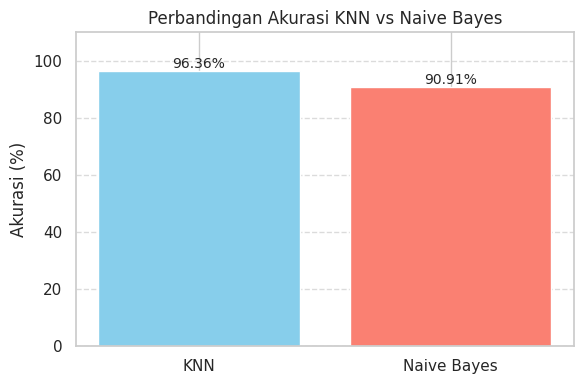

In [177]:
import matplotlib.pyplot as plt

# Data akurasi dari masing-masing model
model_names = ['KNN', 'Naive Bayes']
accuracies = [acc_knn * 100, acc_nb * 100]  # konversi ke persen

# Buat bar chart
plt.figure(figsize=(6, 4))
bars = plt.bar(model_names, accuracies, color=['skyblue', 'salmon'])

# Tambahkan label nilai di atas bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}%', ha='center', fontsize=10)

# Tambahan elemen visual
plt.ylim(0, 110)
plt.ylabel('Akurasi (%)')
plt.title('Perbandingan Akurasi KNN vs Naive Bayes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## **Evaluasi**

### Tujuan Evaluasi

Evaluasi model bertujuan untuk mengetahui seberapa baik performa algoritma klasifikasi dalam memprediksi label pada data uji. Evaluasi dilakukan berdasarkan beberapa metrik utama, yaitu:

- Akurasi: Persentase prediksi yang benar

- Confusion Matrix: Matriks yang membandingkan prediksi vs label aktual

- Precision: Seberapa tepat model dalam memprediksi kelas positif

- Recall: Seberapa banyak kasus positif yang berhasil ditangkap

- F1-score: Rata-rata harmonis antara precision dan recall

### Hasil Evaluasi Model KNN

⚖️ Perbandingan KNN vs Naive Bayes

| **Metrik**       | **KNN**   | **Naive Bayes** |
|------------------|-----------|-----------------|
| **Akurasi**      | **96.36%**| 90.91%          |
| F1-score (avg)   | 0.96      | 0.90            |
| Precision (1)    | 0.95      | 0.83            |
| Recall (1)       | 0.95      | 0.92            |


Berdasarkan hasil evaluasi, model K-Nearest Neighbors (KNN) memberikan performa yang lebih baik dibandingkan Naive Bayes, baik dari segi akurasi, precision, recall, maupun F1-score. Oleh karena itu, model KNN dipilih sebagai model klasifikasi terbaik untuk mendeteksi kanker payudara pada dataset ini.